# Modeling Our Data 

## Introduction 

In this lesson you'll review the modeling process for running regression or similar statistical experiments.

## Objectives
You will be able to:
    
* Identify the various steps involved  in building a model
* Understand that modeling is an iterative process
* Identify target variables and predictor variables

## Fitting an Initial Model

Take a quick review here of how to find a linear regression model. You can also use the sci-kit learn package to do this, but you won't get as many descriptive statistics.

In [1]:
import pandas as pd

from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('mpg excercise.xls')
df.head()

,MPG Highway,Passengers,Length,Wheelbase,Width,U Turn Space,Rear seat,Luggage,Weight,Horsepower,Fueltank
0,31,5,177,102,68,37,26.5,11,2705,140,13.2
1,25,5,195,115,71,38,30.0,15,3560,200,18.0
2,26,5,180,102,67,37,28.0,14,3375,172,16.9
3,26,6,193,106,70,37,31.0,17,3405,172,21.1
4,30,4,186,109,69,39,27.0,13,3640,208,21.1


In [3]:
#Define the Problem
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Length', 'Wheelbase', 'Width', 'U_Turn_Space',
          'Rear_seat', 'Luggage', 'Weight', 'Horsepower', 'Fueltank']

In [4]:
#Some Brief preprocessing
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

,MPG_Highway,Passengers,Length,Wheelbase,Width,U_Turn_Space,Rear_seat,Luggage,Weight,Horsepower,Fueltank
0,31,-0.082794,-0.424883,-0.285386,-0.364210,-0.607145,-0.456945,-0.992270,-0.623674,-0.073088,-1.056458
1,25,-0.082794,0.807793,1.620864,0.429654,-0.296901,0.723496,0.326032,0.825733,1.072509,0.407238
2,26,-0.082794,-0.219437,-0.285386,-0.628831,-0.607145,0.048958,-0.003544,0.512118,0.537897,0.071808
3,26,0.879689,0.670829,0.301153,0.165033,-0.607145,1.060764,0.985183,0.562975,0.537897,1.352541
4,30,-1.045278,0.191455,0.741057,-0.099589,0.013344,-0.288310,-0.333119,0.961350,1.225256,1.352541


In [5]:
#Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     24.03
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           2.02e-20
Time:                        10:43:35   Log-Likelihood:                -223.47
No. Observations:                  93   AIC:                             468.9
Df Residuals:                      82   BIC:                             496.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       29.0860      0.295     98.465      0.000      28.498      29.674
Passengers      -1.0138      0.577     -1.757      0.083      -2.162       0.134
Length           0.4625      0.624      0.741      0.461      -0.779       1.704
Wheelbase        1.9899      0.833      2.389      0.019       0.333       3.647
Width            1.2067      0.759      1.591      0.115      -0.302       2.716
U_Turn_Space    -0.4858      0.545     -0.892      0.375      -1.570       0.598
Rear_seat        0.2338      0.459      0.509      0.612      -0.679       1.147
Luggage          0.3229      0.447      0.723      0.472      -0.566       1.212
Weight          -5.2787      1.220     -4.327      0.000      -7.705      -2.852
Horsepower      -0.1101      0.660     -0.167      0.868      -1.422       1.202
Fueltank        -1.6742      0.703     -2.383      0.019      -3.072      -0.276
==============================================================================
Omnibus:                       15.867   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.638
Skew:                           0.749   Prob(JB):                     7.36e-06
Kurtosis:                       4.963   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assessing the Model
 
When performing an initial assessment of the model you might focus on a number of different perspectives. There are metrics assessing the overall accuracy of the model including $r^2$ and mean square error. There are also many metrics when analyzing how various features contribute to the overall model. These are essential to building a story and intuition behind the model so that educated business strategies can be implemented to optimize the target variable. After all, typically you aren't soley interested in predicting a quantity in a blakc box given said information. Rather, you would often like to know the underlying influencers and how those can be adjusted in order to increase or decrease the final measured quanity whether it be sales, customer base, costs or risk. Such metrics would include p-values associated with the various features, comparing models with features removed and investigating potential multicollinearity in the model. Muliticollinearity also touches upon checking model assumptions. One underlying intuition motivating the regression model is that the features constitute a *set of levers* which, if appropriately adjusted, account for the target variable. The theory then goes that the errors should be simply the cause of noise in our measurements, or smaller unaccounted factors. These errors are then assumed to be normally distributed. 

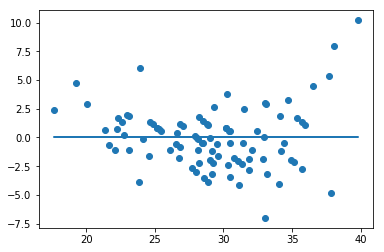

In [6]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

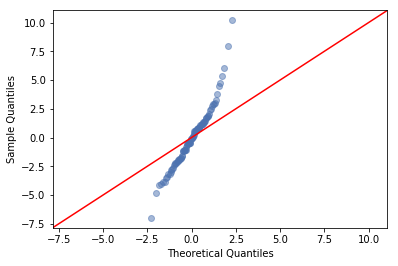

In [7]:
QQ = ProbPlot(model.resid)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plt.show()

## Model Refinement
 
 After assessing the model, it's of course time to refine it. This is an iterative process, often comparin models and the impacts of layering on additional transformations or removing features. 

In [8]:
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank'] #Width could also arguably be remove
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            MPG_Highway   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     58.19
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           6.35e-24
Time:                        10:43:35   Log-Likelihood:                -226.97
No. Observations:                  93   AIC:                             463.9
Df Residuals:                      88   BIC:                             476.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0860      0.296     98.232      0.000      28.498      29.674
Passengers    -1.0457      0.418     -2.501      0.014      -1.877      -0.215
Wheelbase      2.8249      0.713      3.960      0.000       1.407       4.243
Weight        -4.9206      0.894     -5.505      0.000      -6.697      -3.144
Fueltank      -1.4385      0.668     -2.154      0.034      -2.766      -0.111
==============================================================================
Omnibus:                       10.649   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               15.761
Skew:                           0.489   Prob(JB):                     0.000378
Kurtosis:                       4.763   Cond. No.                         6.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

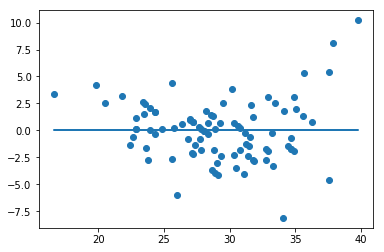

In [9]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])

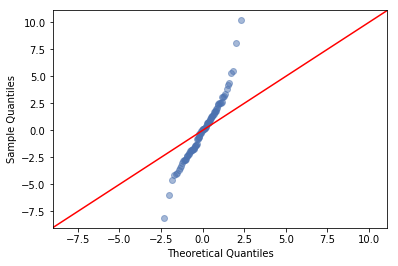

In [10]:
QQ = ProbPlot(model.resid)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plt.show()

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


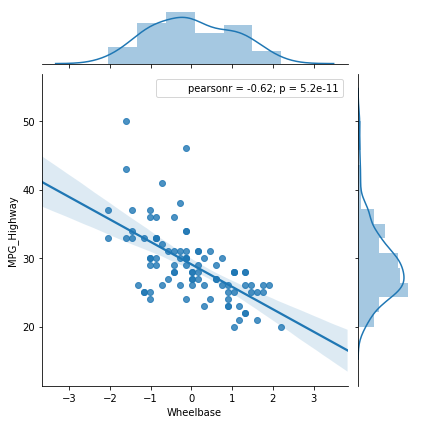

In [11]:
sns.jointplot(x_cols[1],'MPG_Highway', data=df, kind='reg')

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


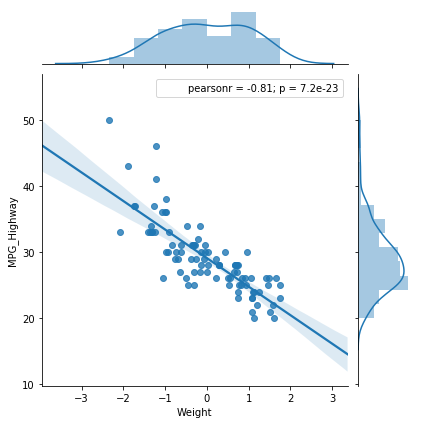

In [12]:
sns.jointplot(x_cols[2],'MPG_Highway', data=df, kind='reg')

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


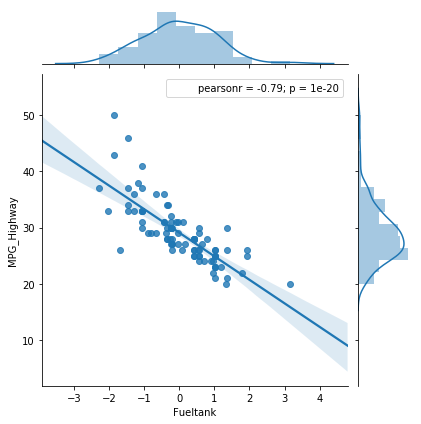

In [13]:
sns.jointplot(x_cols[3],'MPG_Highway', data=df, kind='reg')

## Summary 

In this lesson, you reviews some of the key steps towards building and evaluating a linear regression model. Next, you'll get a chance to continue on with the full-data science process yourself and attempt building a model to meet the original specs from your new boss at Lego!